# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
df.loc[:,'Hemisfério'] = 0
df1 = pd.DataFrame({ 'Latitude' : df.Latitude,'Hemisfério' : df.Hemisfério})
df1.Hemisfério[df1.Latitude>0] = 1
df1['Hemisfério']=df1["Hemisfério"].astype('category')
df1["Hemisfério"].cat.categories = ["Sul", "Norte"]
df1.head(5)

C:\Users\andra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hemisfério,Latitude
0,Norte,19.246
1,Norte,1.863
2,Sul,-20.579
3,Sul,-59.076
4,Norte,11.938


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,0
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,0
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,0
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,0


In [55]:
[loc,scale]=expon.fit(df.Magnitude,scale=1)
lamb = 2
mu = 1/lamb
sigma = 1/lamb
#Validando os valores da saída:
print('média: ', mu, ' vs ', df.Magnitude.mean())
print('dp: ', sigma, ' vs ', df.Magnitude.std())

média:  0.5  vs  5.882530753460003
dp:  0.5  vs  0.4230656393157772


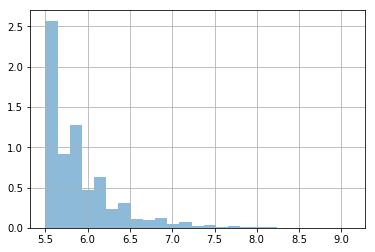

In [64]:
df["Magnitude"].hist( normed = True,histtype='stepfilled', alpha=0.5,bins=25)


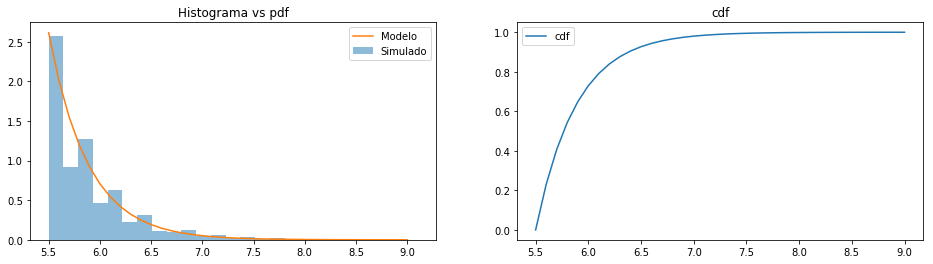

In [58]:

#Plots
fig, ax = plt.subplots(1, 2, figsize = (16,4))

#Histograma vs pdf
ax[0].hist(df.Magnitude, normed = True,histtype='stepfilled', alpha=0.5,bins=25)
x = np.arange(df.Magnitude.min(), df.Magnitude.max(), 0.1)
ax[0].plot(x, expon.pdf(x, loc, scale))
ax[0].set_title('Histograma vs pdf')
ax[0].legend(['Modelo', 'Simulado'])

#Cumulative Distribution Function - cdf
ax[1].plot(x, expon.cdf(x, loc, scale))
ax[1].set_title('cdf')
ax[1].legend(['cdf'])



Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

Podemos perceber que como  o aumento da Magnitude 

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [107]:
cross=pd.crosstab(df1.Hemisfério,df.Type, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=True)
cross

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Sul,0.545191,0.000085,0.001196,0.000043
Norte,0.447121,0.000085,0.006279,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [108]:
ProbEarth=cross.loc["Sul","Earthquake"] + cross.loc["Norte","Earthquake"]
ProbHemisferioNorte=cross.loc["Norte","Earthquake"]/ProbEarth
ProbHemisferioSul=cross.loc["Sul","Earthquake"]/ProbEarth
ProbHemisferioNorte*100

45.058539944903586

Explique o seu raciocínio

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [125]:
# P(Nuclear/Norte)   r= ( A ∩ B ) / Pr(B)
Pnuclear=cross.loc["Norte","Nuclear Explosion"]
Pnorte=cross.loc["Norte",:]
r=Pnuclear/Pnorte.sum()
r*100


1.3845719129697656

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

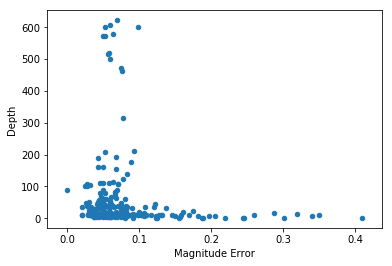

In [68]:
dispersão = df.plot.scatter(x='Magnitude Error', y='Depth');
corr=df.corr()


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [74]:
corr

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Hemisfério
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762,NaN
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061,NaN
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002,NaN
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398,NaN
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620,NaN
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865,NaN
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616,NaN
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473,NaN
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217,NaN
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778,NaN


In [77]:
corr.loc["Depth","Magnitude Error"]

-0.076918438923387164

Explique o que significa o valor da correlação calculada acima? 

Como a correlacao esta muito proxima de 0, podemos considerar que ambos nao possuem nenhuma correlacao!

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

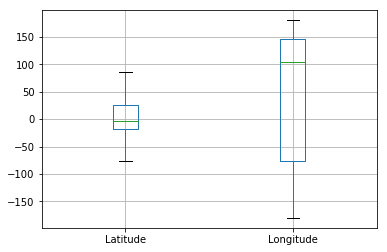

In [483]:
df.boxplot(column=["Latitude","Longitude"], by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, )

In [128]:
df2 = pd.DataFrame({ 'Latitude' : df.Latitude,'Longitude' : df.Longitude})
df2.describe()

,Latitude,Longitude
count,23412.000000,23412.000000
mean,1.679033,39.639961
std,30.113183,125.511959
min,-77.080000,-179.997000
25%,-18.653000,-76.349750
50%,-3.568500,103.982000
75%,26.190750,145.026250
max,86.005000,179.998000


## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [129]:
Mt=df["Magnitude Type"]
Nu=df["Type"]


df2 = pd.DataFrame({ 'Magnitude_Type' : Mt,'Type' : Nu,'Hemisfério' : df1.Hemisfério})
cross2=pd.crosstab(df2.Hemisfério,df2.Magnitude_Type, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=True)
cross2

Magnitude_Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Hemisfério,,,,,,,,,,
Sul,0.088727,0.000000,0.000000,0.000000,0.039985,0.172498,0.057499,0.140117,0.000598,0.047161
Norte,0.071938,0.000256,0.000214,0.003289,0.032722,0.157375,0.047503,0.102055,0.000513,0.037550


In [133]:
cross3 = pd.crosstab(df["Magnitude Type"],[df.Type,df2["Hemisfério"]],normalize=True)
cross3

Type           Earthquake           Explosion           Nuclear Explosion  \
Hemisfério            Sul     Norte       Sul     Norte               Sul   
Magnitude Type                                                              
MB               0.087445  0.066086  0.000085  0.000085          0.001196   
MD               0.000000  0.000256  0.000000  0.000000          0.000000   
MH               0.000000  0.000214  0.000000  0.000000          0.000000   
ML               0.000000  0.002777  0.000000  0.000000          0.000000   
MS               0.039985  0.032722  0.000000  0.000000          0.000000   
MW               0.172498  0.157375  0.000000  0.000000          0.000000   
MWB              0.057499  0.047503  0.000000  0.000000          0.000000   
MWC              0.140074  0.102055  0.000000  0.000000          0.000000   
MWR              0.000598  0.000513  0.000000  0.000000          0.000000   
MWW              0.047161  0.037550  0.000000  0.000000          0.000000   

Type                     Rock Burst  
Hemisfério         Norte        Sul  
Magnitude Type                       
MB              0.005767   0.000000  
MD              0.000000   0.000000  
MH              0.000000   0.000000  
ML              0.000513   0.000000  
MS              0.000000   0.000000  
MW              0.000000   0.000000  
MWB             0.000000   0.000000  
MWC             0.000000   0.000043  
MWR             0.000000   0.000000  
MWW             0.000000   0.000000

In [143]:
# 0.001196
# ProAN=cross2.loc["Norte","MB"]
# ProBN=cross.loc["Norte","Nuclear Explosion"]
# ProAS=cross2.loc["Sul","MB"]
# ProBS=cross.loc["Sul","Nuclear Explosion"]
# print((ProAN*ProBN-
# ProAS*ProBS)*100)
result=cross3.loc["MB","Nuclear Explosion"]
result
# Ou seja norte e maior
# E mais provável que tenha sido no Norte!

Hemisfério
Sul      0.001196
Norte    0.005767
Name: MB, dtype: float64